In [1]:
%load_ext autoreload
%autoreload 2

import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

from model import *
from view import *

In [2]:
fs = 625e6
duration = 10000e-6
F_main_real=440e3

t = np.linspace(0, duration, int(duration * fs))  
U = np.sin(2 * np.pi * F_main_real * t)

In [3]:
R= 100
C= 475e-12

t,I= RC_transfer(t,U,R,C)

439999.9296


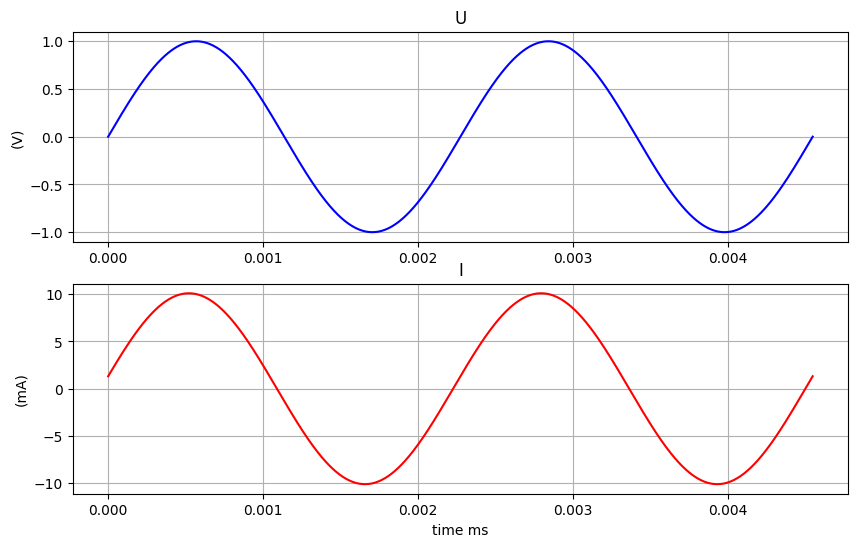

In [4]:
F,V = get_spectrum3([t,U])

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

print(F_peak_calc)

T_counts=convert_to_counts(t,T)

window=T_counts*2

show_I_U(t,I,U,0,window)

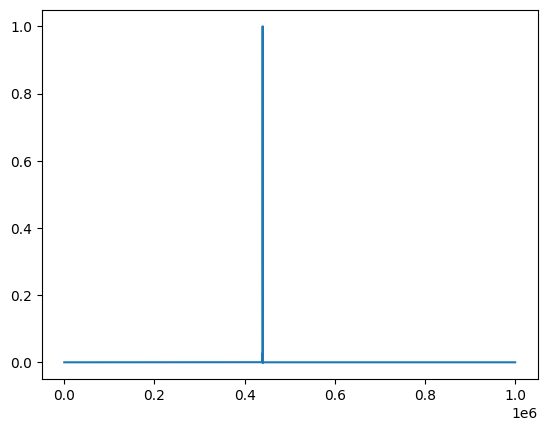

In [5]:
plt.plot(F,V)

np.float64(7.481168556220574)

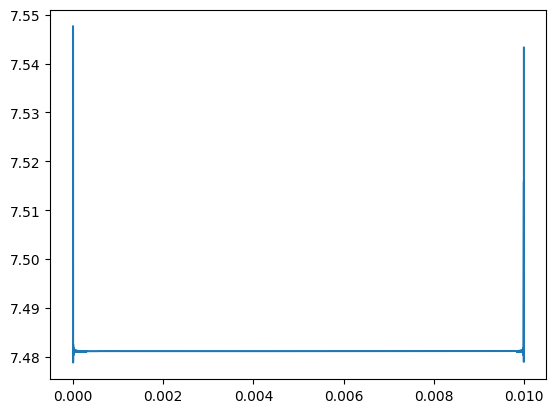

In [6]:
time_hilbert, phase_hilbert=get_phase_hilbert(t, U, I)

plt.plot(time_hilbert, phase_hilbert)

phase_mean=abs(np.mean(phase_hilbert))

central_index=int(len(phase_hilbert)/2)
phase_mean=phase_hilbert[central_index]
phase_mean

In [7]:
# Сравнение частоты 

f_rel_real=1/(2*pi*R*C)
f_rel_real

3350630.380882007

In [8]:
f_rel_calc_mean = F_peak_calc * np.cos(phase_mean*0.0174533) / np.sin(phase_mean*0.0174533)
print(f_rel_calc_mean)

3350639.3185001607


[7.48085575 7.4808554  7.48085508 ... 7.48109077 7.48108771 7.48108465]


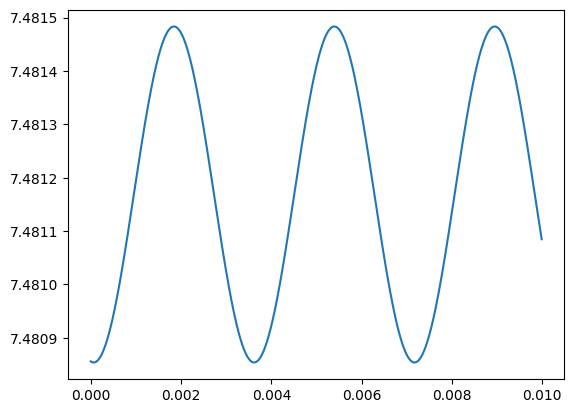

In [9]:
times, phase_diff = get_phase_FFT(U, I, fs, F_peak_calc, n_periods=5, overlap=0.5)

print (phase_diff)
plt.plot(times, phase_diff)

np.float64(3350632.5277378946)

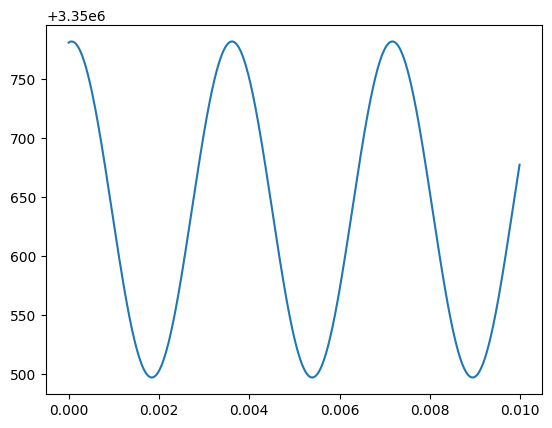

In [10]:
phase_diff = np.array(phase_diff)  # гарантируем, что это массив
f_graph = F_peak_calc * np.cos(phase_diff*0.0174533) / np.sin(phase_diff*0.0174533)

plt.plot(times,f_graph)

np.mean(f_graph)